# Versuch 255 - Röntgenspektrometer, Jan Bartels

In diesem Versuch wird die Plancksche-Konstante, die Wellenlängen eines Röntgenstrahlers sowie die Avogadro-Konstante mithilfe eines Röntgenspektrometers bestimmt.

Daher wurde folgendes aufgetragen:  

1. Messungen eines Röntgenspektrums vom LiF-Kristalles auswerten
2. Bestimmung der Avogadro-Konstante mithilfe des Spektrums eines NaCl-Kristalles
3. (optional) Röntgenaufnahmen von Alltagsgegenständen aufnehmen


Dafür wurde zur Verfügung gestellt:
    
#### Material

* Röntgengerät mit Röntgenröhre
* Goniometer
* Zählrohr
* LiF-Kristall
* NaCl-Kristall
* Computer mit Drucker
* Leuchtschirm mit CCD-Kamera

#### Aufbau

![Aufbau](Resources/aufbau1.png)
Abbildung 1: Aufbau

## Theoretische Grundlagen

Eine Röntgenröhre beschleunigt Elektronene mithilfe eines elektrischen Fehldes auf eine Geschwindigkeit $v$. Nach dem Energieerhaltungsgesetz besitzten die beschleunigten Elektronen nach Durchlaufen eines Felder der Spannung $U$ die Geschwindigkeit:  

\begin{align}
    E_{kin} &= \frac{1}{2} m_e v_e^2\\
    E_{pot} &= eU\\
    v &= \sqrt{\frac{2eU}{m_e}}\\
\end{align}

Diese treffen nach einer geringen Entfernung auf eine Anode und werden gestoppt. Dadurch geben die Elektronen ihre Energie in Form von elektromagnetischer Strahlung an. Da deren Energie diskretisiert ist, folgt für die Wellenlänge $\lambda$:  

\begin{align}
    E &= eU=hf=h\frac{c}{\lambda_{gr}}\\
    \lambda_{gr} &= \frac{hc}{eU}
\end{align}

$e$ entspricht der Elementarladung eines Eletrones und $m_e$ dessen Masse, $c$ die Lichtgeschwindigkeit und $h$ das Planck'sche Wirkungsquantum. Bei einem solchen Fall spricht man von Bremsstrahlung. Die Elektronen können aber auch bei charakteristischen Energien die Elektronen der Anodenatome aus deren Schale herauslösen, sodass Elektronen höhrere Schalen nachrücken und überflüssige Strahlung in Form von elektromagentischen Wellen emittieren. Mit dem Moseley'schen Gesetz kann man die freie Energie berechnen beim Übegang von der n-ten Schale auf die m-te:

\begin{align}
    E_{n \rightarrow m}=hcR_{\infty}(Z-A)^2(\frac{1}{m^2}-\frac{1}{n^2})
\end{align}

$R_{\infty}$ beschreibt die Rydbergkonstante und $Z$ die Kernladungszahl. Zusammengefassst ist das Spektrum, welches man aufnehmen kann die Summe des Spektrums der Bremsstrahlung und das der charakteristischen Strahlung:

![rontgenspektrum.png](Resources/rontgenspektrum.png)
Abbildung 2: Röntgenspektrum  


Für die Aufnahme des Spektrums benutzt man ein Kristall um sich die Bragg-Reflexion zu Nutzen zu machen. Einfallende Strahlung trifft auf die Gitteratome des Kristalles und wird an verschiedenen Schichten reflektriert. Dann überlagern sich jene em-Wellen wieder mit unterschiedlichem Gangunterschied $\Delta$. 

![Bragg.png](Resources/bragg.png)
Abbildung 3: Bragg-Reflektion

Der Gangunterschied berechnet sich aus:  

\begin{align}
    \sin{\vartheta} &= \frac{\Delta s}{2d}\\
    \Delta s &= n\lambda\\
    2d\sin{\vartheta} &= n\lambda
\end{align}

Unter der Drehkristallmethode versteht man also das Variieren des Eintrittswinkels um die resultierende Strahlung am Zählrohr zu messen. Der hier benutzte NaCl-Kristall besteht aus Elementarzellen, welche aus alternierenden Natrium- und Chloratomen bestehen. Beim LiF-Kristall gilt dasselbe nur mit alternierenden Flour- und Lithiumkristallen. Um die Avogadrokonstante $N_A$ berechnen zu können braucht man lediglich das Molargewicht $M_{Mol}$ des Kristalls und die Gitterkonstante $d$ sowie die Dichte:  

\begin{align}
    N_{A} &= \frac{M_{Mol}}{2\rho d^3}
\end{align}


## Messprotokoll

Das Messprotokoll ist im Anhand hinterlegt. Das genaue Prozedere wird in den Auswertungen genauer erläutert.

## Auswertung

### 1. Messung des Röntgenspektrums mit einem LiF-Kristall

Das Röntgenspektrometer wurde eingeschltet und bei einer Beschleunigungsspannung von $U = (35.00 \pm 0.05) kV$ und einem Emissionsstrom von $I = (1.000 \pm 0.005) mA$ , einer Messzeit von $t=(5.0 \pm 0.5)s$ und einer Winkelreichweite von $\Delta\beta=(0.20 \pm 0.05) grad$ wurde das Emissionsspektrum des Kristalles als Funktion des Winkels aufgenommen.

In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import curve_fit
import uncertainties.unumpy as unp
import uncertainties as unc
import scipy.constants as const
import scipy.interpolate as ip
import matplotlib.pyplot as plt
import pandas as pd
from fpdf import FPDF

In [3]:
#Panda zum Einlesen von Daten
data = pd.read_csv('Messdaten/LiF-Kristall.txt', delimiter='\s+',decimal=',', index_col=False)
data.columns = ['Winkel', 'Zählrate']
beta1 = unp.uarray(data['Winkel'], 0.05)
counts1 = unp.uarray(data['Zählrate'], np.sqrt(data['Zählrate']))
data

Winkel  Zählrate
0      3.2      15.6
1      3.4      18.4
2      3.6      18.2
3      3.8      19.4
4      4.0      25.2
..     ...       ...
90    21.2      60.0
91    21.4      59.2
92    21.6      54.2
93    21.8      51.6
94    22.0      55.4

[95 rows x 2 columns]

Weil nachher Stellen der Graphen extrapoliert werden müssen, werden nun für die curve_fit Funktionen die Funktionen erstellt. "gauss_optim" wird dadurch gerechtfertigt, dass durch das charakteristische Spektrum jeweils 2 Ausschläge zu erwarten sind, daher also die Summe zweier Gaußfunktionen.

In [4]:
def linear(x,a,b):
    return a*x+b
def gaussian(x,A,mu,sig,y0):
    return y0+A*np.exp(-(x-mu)**2/(2*sig**2))
def gauss_optim(x,a,b,A1,mu1,sig1,A2,mu2,sig2):
    return linear(x,a,b)+ gaussian(x,A1,mu1,sig1,0)+gaussian(x,A2,mu2,sig2,0)

2 Ausgleichsgeraden werden mithilfe der Messwerte ermittelt und sodann der Schnittpunkt berechnet. Dafür gilt folgende Formel:

\begin{align}
    f(x)_1 &= m_1x+b_1\\
    f(x)_2 &= m_2x+b_2\\
    m_1x+b_1 &= m_2x+b_2\\
    x(m_1-m_2) &= b_2 - b_1\\
    x &= \frac{b_2-b_1}{m_1-m_2}
\end{align}

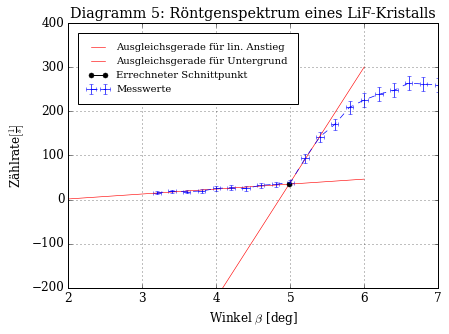

In [5]:
popt1, pcov1 = curve_fit(linear, unp.nominal_values(beta1[9:12]), unp.nominal_values(counts1[9:12]), sigma=unp.std_devs(counts1[9:12]))
popt2, pcov2 = curve_fit(linear, unp.nominal_values(beta1[:9]),unp.nominal_values(counts1[:9]), sigma=unp.std_devs(counts1[:9]))

#Schnittpunkt berechnen durch gleichsetzen
beta0=(popt2[1]-popt1[1])/(popt1[0]-popt2[0])
beta0_err=np.sqrt(pcov2[1,1]/(popt1[0]-popt2[0])**2+pcov1[1,1]/(popt1[0]-popt2[0])**2+((popt2[1]-popt1[1])*pcov1[0,0]**0.5/(popt1[0]-popt2[0])**2)**2+((popt2[1]-popt1[1])*pcov2[0,0]**0.5/(popt1[0]-popt2[0])**2)**2)
beta0 = unc.ufloat(beta0, beta0_err)
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.clf()
plt.style.use('classic')
plt.rcParams['font.family']='serif'
plt.rcParams['errorbar.capsize'] = 2
plt.errorbar(unp.nominal_values(beta1), unp.nominal_values(counts1), xerr=unp.std_devs(beta1), yerr=unp.std_devs(counts1), linewidth=0.7,linestyle='--', marker='.',markersize=2,color='b', label='Messwerte')
plt.plot(np.linspace(4,6,2), linear(np.linspace(4,6,2),*popt1), linewidth=0.6, color='red', label='Ausgleichsgerade für lin. Anstieg')
plt.plot(np.linspace(2,6,2), linear(np.linspace(2,6,2), *popt2), linewidth=0.6, color='red', label='Ausgleichsgerade für Untergrund')
plt.plot(unc.nominal_value(beta0),linear(unc.nominal_value(beta0),*popt1), marker='o', mec='black', markersize=5,color='black', label='Errechneter Schnittpunkt')
#Visuals
plt.title('Diagramm 5: Röntgenspektrum eines LiF-Kristalls')
plt.ylabel('Zählrate'+r'$[\frac{1}{s}]$')
plt.xlabel('Winkel '+r'$\beta$ '+u'[deg]')
plt.xlim(2.0,7.0)
plt.ylim(-200,400)
plt.grid(ls='dotted')
plt.legend(frameon=True,fontsize='small', borderpad=1,borderaxespad=1, loc=2)
plt.tight_layout()
plt.savefig('Results/Diagramm5V255.pdf', format='PDF')

Der Winkel $\beta$ beträgt nach unserer Messung: 

\begin{align}
    \beta = (4.9 \pm 0.3) [deg]
\end{align}

Setze nun in Formel $(10)$ alle Werte ein, wobei n=1. Formel sodann Gleichung $6$ nach $h$ um und erhalte die Plancksche Konstante. Wichtig ist noch anzumerken, dass man folgende Formel für den Winkel des Startes der 2ten Ordnung benötigt:

\begin{align}
    \frac{\sin(\vartheta_1)}{\sin(\vartheta_2)} &= \frac{n_1}{n_2}\\
    \vartheta_2 &= \arcsin(2*\sin(\vartheta_1))
\end{align}
Wobei natürlich klar ist, dass $n_1 = 1$ und $n_2 = 2$ .

In [2]:
#lambda_gr
d_LiF = unc.ufloat(201.4,0.1) * const.pico
lambda_gr = 2*d_LiF*unp.sin(beta0*2*const.pi/360.)
h = lambda_gr * const.e * 35 * const.kilo / const.speed_of_light
uncertainty_in_percent = unc.std_dev(h)/unc.nominal_value(h)
sig =(const.Planck-unc.nominal_value(h))/np.sqrt(pow(unc.std_dev(h),2))
print('h ist den Messungen zufolge: ' + str(h))
print('Die Unsicherheit zum Literaturwert beträgt ' + str(sig) + ' %')
#Bragg zur Berechnung des Winkels
beta2=unp.arcsin(2*unp.sin(beta0 *2*const.pi/360.))*360/const.pi /2.
print('Der erwartet Winkel für das Spektrum 2ter Ordnung ist: ' + str(beta2) + 'grad')

NameError: name 'beta0' is not defined

Sodass man den Wert

\begin{align}
    h &= (6.5 \pm 0.4) * 10^{-34} Js
\end{align}

erhält. Dies entspricht einer Unsicherheit von 7\%, was auf eine genaue Messung und Auswertung hindeutet. Vergleicht man dieses mit dem Literaturwert $h=6.62607015*10^{-34} Js$ , welcher nach CODATA exakt ist, kommt man auf eine Abweichung von 0.3 $\sigma$ , was wiederum beweist, dass die Fehler nicht signifikant sind.  
Der Winkel für den Beginn der 2ten Ordung beträgt:  

\begin{align}
    \vartheta_2 =(10.0 \pm 0.5) [deg]
\end{align}

Dieser stimmt auch mit den Messungen überein, da die charakteristischen Spektren der 2ten Ordnung schon bei einem Winkel von 11 Grad beginnen. Weil jedoch das aufgenommene Spektrum die Summe der beiden Ordnungsspektren darstellt, ist es nicht genau verifizierbar.
Mögliche Fehlerquellen lasse ich hier unkommentiert zurück und komme am Ende nochmal darauf zu sprechen.


Für b) wurde zuerst von uns grob die Lage der $K_\alpha$ - und $K_\beta$ -Linien dem Diagramm 1 entnommen. Sodann stellten wir das Röntgenspektrometer auf die im Protokoll beschriebenen Parameter und starteten erneut eine Aufnahme. 

In [7]:
#b)Bestimmung der Wellenlängen der K_alpha und K_beta Linien
data2 = pd.read_csv('Messdaten/LiF-Kristall_1Ordnung.txt', index_col=False, delimiter='\s+', decimal=',')
data2.columns=['Winkel','Zählrate']
beta2 = unp.uarray(data2['Winkel'],0.05)
counts2 = unp.uarray(data2['Zählrate'], np.sqrt(data2['Zählrate']))
data2

Winkel  Zählrate
0      8.1     252.2
1      8.2     249.8
2      8.3     253.8
3      8.4     245.2
4      8.5     243.6
5      8.6     242.2
6      8.7     245.8
7      8.8     311.2
8      8.9     402.0
9      9.0     651.0
10     9.1     626.0
11     9.2     452.0
12     9.3     282.6
13     9.4     254.0
14     9.5     247.4
15     9.6     243.2
16     9.7     253.6
17     9.8     251.0
18     9.9     272.4
19    10.0     450.2
20    10.1    1297.2
21    10.2    1662.6
22    10.3    1356.0
23    10.4     651.8
24    10.5     278.0
25    10.6     236.6
26    10.7     233.0
27    10.8     211.6
28    10.9     219.2
29    11.0     213.2
30    11.1     205.8
31    11.2     193.4
32    11.3     194.2
33    11.4     192.6
34    11.5     199.2

Lambda für beta-Linien: (7.139+/-0.006)e-11
Lambda für alpa-Linien: (6.339+/-0.019)e-11
Die Abweichung von alpha zum Literaturwert beträgt 5.264359155542455
Die Abweichung von beta zum Literaturwert beträgt 1.525799020623514
(1.97+/-0.10)e-12


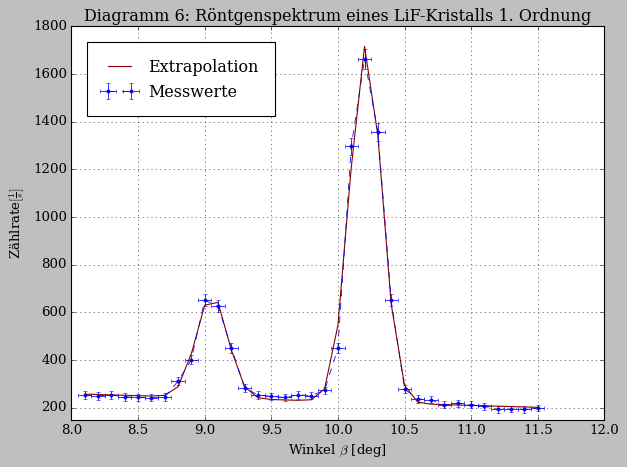

In [8]:
#Extrahiere linearen Teil und erhalte Steigung
x_linear = np.append(data2['Winkel'][0:6], data2['Winkel'][12:18])
x_linear = np.append(x_linear, data2['Winkel'][24:32])
y_linear = np.append(data2['Zählrate'][0:6], data2['Zählrate'][12:18])
y_linear = np.append(y_linear, data2['Zählrate'][24:32])

popt_lin, pcov_lin = curve_fit(linear, x_linear, y_linear)



char_corr = data2['Zählrate'] - linear(data2['Winkel'], *popt_lin)

popt_gauss1, pcov_gauss1 = curve_fit(gaussian, data2['Winkel'][4:15],char_corr[4:15],p0=[400,9.1,0.03,0])
popt_gauss2, pcov_gauss2 = curve_fit(gaussian, data2['Winkel'][18:24],char_corr[18:24],p0=[1400,10.25,0.03,0])
popt_fin, pcov_fin = curve_fit(gauss_optim, data2['Winkel'],data2['Zählrate'],p0=[*popt_lin,*popt_gauss1[0:3],*popt_gauss2[0:3]])


#Plot
plt.clf()
plt.errorbar(unp.nominal_values(beta2), unp.nominal_values(counts2), xerr=unp.std_devs(beta2),yerr=unp.std_devs(counts2),linestyle='--',linewidth=0.7, marker='.',label='Messwerte',color='b')
plt.plot(data2['Winkel'],gauss_optim(data2['Winkel'],*popt_fin),color='darkred',linewidth=1,ls='-',label='Extrapolation')

#Visuals
plt.title('Diagramm 6: Röntgenspektrum eines LiF-Kristalls 1. Ordnung')
plt.ylabel('Zählrate'+r'$[\frac{1}{s}]$')
plt.xlabel('Winkel '+r'$\beta$ '+u'[deg]')
plt.xlim(8.0,12)
plt.ylim(150,1800)
plt.grid(ls='dotted')
plt.legend(frameon=True,fontsize='large', borderpad=1,borderaxespad=1, loc=2)
plt.tight_layout()
plt.savefig('Results/Diagramm6V255.pdf', format='PDF')

#Anhand des Wertes mu einer Gaußverteilung erhält man das Maximum
K_a = unc.ufloat(popt_fin[3],pcov_fin[3][1])
K_b = unc.ufloat(popt_fin[6],pcov_fin[6][1])

#Errechne Lambda mit Formel (9) - Umrechnung in Radiant
lambda_beta = 2*201.4 * unp.sin(K_a*2*const.pi/360.) * const.pico
lambda_alpha = 2 * 201.4 *unp.sin(K_b*2*const.pi/360.) * const.pico
print('Lambda für beta-Linien: '+str(lambda_alpha))
print('Lambda für alpa-Linien: '+str(lambda_beta))

sigm1 = (unp.nominal_values(lambda_beta)-(63.1*const.pico))/unp.std_devs(lambda_beta)
sigm2 = (unp.nominal_values(lambda_alpha)-(71.1*const.pico))/unp.std_devs(lambda_alpha)
print('Die Abweichung von alpha zum Literaturwert beträgt ' + str(sigm2))
print('Die Abweichung von beta zum Literaturwert beträgt ' + str(sigm1))
halbwertsbreite = 2*unp.sqrt(2*np.log(2))*unc.ufloat(popt_fin[7],pcov_fin[7][1])
halbwertsbreite = 2*201.4*const.pico*unp.sin(halbwertsbreite*2*const.pi/360.)
print(halbwertsbreite)

D.h unseren Messungen zuvolge und meiner Auswertung nach erhält man:
\begin{align}
    \lambda_{\alpha} &= (71,39 \pm 0.06) pm \\
    \lambda_{\beta} &= (63,39 \pm 0.19) pm
\end{align}
Der Fehler der Wellenlänge zur $K_{\alpha}$ Linie zum Literaturwert beträgt 5.3$\sigma$ und der von $K_{\beta}$ 1.6$\sigma$. Das muss zwangsläufig auf die Bestimmung der Fehler und die Berechnungen zurückführen. Die Abweichung zum Literaturwert fällt so groß aus, weil die Messfehler sehr gering sind und diese werden durch die anfangs definierten Unsicherheiten verursacht. Würde man der Apparatur also mehr Fehler zutrauen, so würde die Abweichung vom 5.3$\sigma$ geringer ausfallen und somit nicht mehr signifikant sein. Die Anzahl an Messwerten sollte man erhöhen um ein präzieseres Ergebnis zu erhalten. Das liegt daran, dass für die Extrapolation die Anzahl der Messwerte auch deren Genauigkeit beeinflusst. Weil aber das Röntgenspektrometer nicht genauer aufnehmen kann, bleibt dies unmöglich. Die Halbwertsbreite wurde als
\begin{align}
    HWB &= (1.97\pm0.1)pm
\end{align}
bestimmt.

In [17]:
#b)Bestimmung der Wellenlängen der K_alpha und K_beta Linien 2ter Ordnung
data3 = pd.read_csv('Messdaten/LiF-Kristall_2Ordnung.txt', index_col=False, delimiter='\s+', decimal=',')
data3.columns=['Winkel','Zählrate']
beta3 = unp.uarray(data3['Winkel'],0.05)
counts3 = unp.uarray(data3['Zählrate'], np.sqrt(data3['Zählrate']))

Lambda für beta-Linien: (7.1200+/-0.0006)e-11
Lambda für alpa-Linien: (6.3297+/-0.0033)e-11
Die Abweichung von alpha zum Literaturwert beträgt 15.520245183890738
Die Abweichung von beta zum Literaturwert beträgt 5.92459556550283


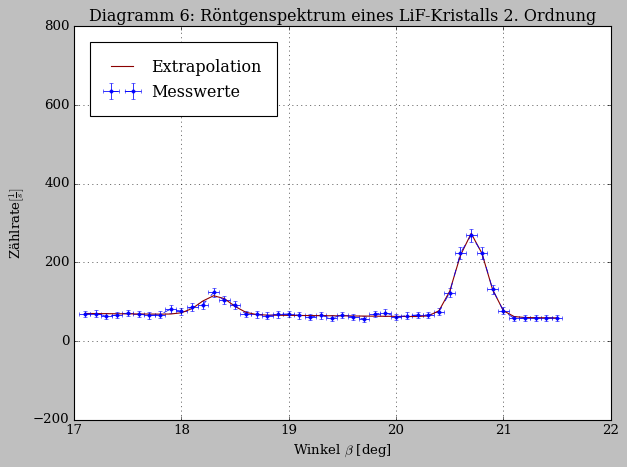

In [10]:
#Extrahiere linearen Teil und erhalte Steigung
x2_linear = np.append(data3['Winkel'][0:6], data3['Winkel'][17:26])
y2_linear = np.append(data3['Zählrate'][0:6], data3['Zählrate'][17:26])

popt_lin2, pcov_lin2 = curve_fit(linear, x2_linear, y2_linear)


char_corr2 = data3['Zählrate'] - linear(data3['Winkel'], *popt_lin2)

popt_gauss3, pcov_gauss3 = curve_fit(gaussian, data3['Winkel'][8:15],char_corr2[8:15],p0=[40,18.2,0.03,0])
popt_gauss4, pcov_gauss4 = curve_fit(gaussian, data3['Winkel'][29:43],char_corr2[29:43],p0=[200,20.8,0.03,0])
popt_fin2, pcov_fin2 = curve_fit(gauss_optim, data3['Winkel'],data3['Zählrate'],p0=[*popt_lin2,*popt_gauss3[0:3],*popt_gauss4[0:3]])





plt.clf()
plt.errorbar(unp.nominal_values(beta3), unp.nominal_values(counts3), xerr=unp.std_devs(beta3),yerr=unp.std_devs(counts3),linestyle='--',linewidth=0.7, marker='.',label='Messwerte',color='b')
plt.plot(data3['Winkel'],gauss_optim(data3['Winkel'],*popt_fin2),color='darkred',linewidth=1,ls='-',label='Extrapolation')


#Visuals
plt.title('Diagramm 6: Röntgenspektrum eines LiF-Kristalls 2. Ordnung')
plt.ylabel('Zählrate' +r'$[\frac{1}{s}]$')
plt.xlabel('Winkel '+r'$\beta$ '+u'[deg]')
plt.xlim(17.0,22)
plt.ylim(-200,800)
plt.grid(ls='dotted')
plt.legend(frameon=True,fontsize='large', borderpad=1,borderaxespad=1, loc=2)
plt.tight_layout()
plt.savefig('Results/Diagramm7V255.pdf', format='PDF')


#Anhand des Wertes mu einer Gaußverteilung erhält man das Maximum
K2_b = unc.ufloat(popt_fin2[3],np.maximum(np.abs(pcov_fin2[3][0]),np.abs(pcov_fin2[3][1])))
K2_a = unc.ufloat(popt_fin2[6],pcov_fin2[6][1])

#Errechne Lambda mit Formel (9) - Umrechnung in Radiant
lambda2_beta = 201.4 * unp.sin(K2_b*2*const.pi/360.) * const.pico
lambda2_alpha = 201.4 *unp.sin(K2_a*2*const.pi/360.) * const.pico
print('Lambda für beta-Linien: '+str(lambda2_alpha))
print('Lambda für alpa-Linien: '+str(lambda2_beta))

sigm1 = (unp.nominal_values(lambda2_beta)-(63.1*const.pico))/unp.std_devs(lambda2_beta)
sigm2 = (unp.nominal_values(lambda2_alpha)-(71.1*const.pico))/unp.std_devs(lambda2_alpha)
print('Die Abweichung von alpha zum Literaturwert beträgt ' + str(sigm2))
print('Die Abweichung von beta zum Literaturwert beträgt ' + str(sigm1))

Auch hier erhält man die Messergebnisse:
\begin{align}
    \lambda_{\alpha} &= (71,200 \pm 0.006) pm \\
    \lambda_{\beta} &= (63,30 \pm 0.04) pm
\end{align}

Beachtlich sind hier auch wiederum die enormen und signifikanten Abweichungen zu den Literaturwerten. Weil die Rechnungen sich nicht unterscheiden und völlig analog sind, muss dies an der Anzahl an Messwerten und deren Genauigkeit liegen.

In [11]:
#c) Bestimmung des Wirkungsquantum mit Isochormathenmethode
U = np.linspace(20,35,16) * const.kilo
U = unp.uarray(U,0.1  *const.kilo)
n = np.array([1.85,2.3,2.95,4.75,25.55,52.20,78.30,102.7,120.3,144.,159.6,181.2,208.6,218.1,236,264.6])
n = unp.uarray(n,np.sqrt(n))

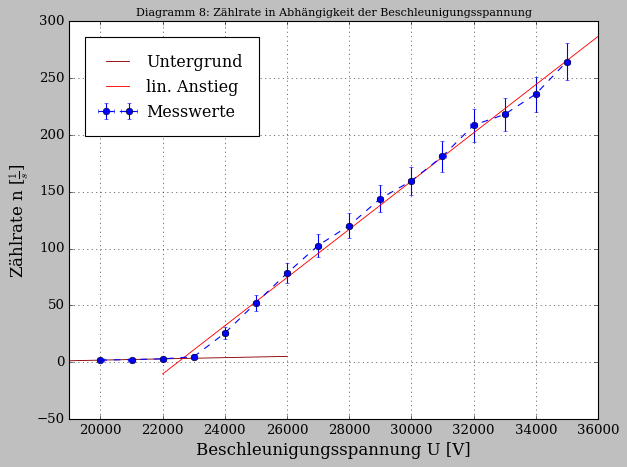

In [12]:
popt4, pcov4 = curve_fit(linear,unp.nominal_values(U[0:3]),unp.nominal_values(n[0:3]))
popt5, pcov5 = curve_fit(linear,unp.nominal_values(U[3:]),unp.nominal_values(n[3:]))

plt.clf()
plt.errorbar(unp.nominal_values(U),unp.nominal_values(n),xerr=unp.std_devs(U),yerr=unp.std_devs(n),marker='o',ls='--',label='Messwerte')
plt.plot(np.linspace(18*const.kilo,26*const.kilo,9),linear(np.linspace(18*const.kilo,26*const.kilo,9),*popt4),label='Untergrund',linewidth=0.8,color='darkred',ls='-')
plt.plot(np.linspace(22*const.kilo,36*const.kilo,15),linear(np.linspace(22*const.kilo,36*const.kilo,15),*popt5),label='lin. Anstieg',linewidth=0.8,color='red',ls='-')

plt.title('Diagramm 8: Zählrate in Abhängigkeit der Beschleunigungsspannung',size=10)
plt.xlabel('Beschleunigungsspannung U [V]',size=15)
plt.ylabel('Zählrate n '+r'[$\frac{1}{s}$]',size=15)
plt.xlim(19*const.kilo, 36*const.kilo)
plt.ylim(-50,300)
plt.grid(ls='dotted')
plt.legend(frameon=True,fontsize='large', borderpad=1,borderaxespad=1, loc=2)
plt.tight_layout()
plt.savefig('Results/Diagramm8V255.pdf', format='PDF')

Jetzt wird der Schnittpunkt ananlog wie oben berechnet. Weil der Winkel $\beta$ bekannt ist, kann man anhand dessen die Wellenlänge der Strahlung bestimmen. Aus der Wellenlänge $\lambda_{gr}$ und der Spannung $U_{gr}$ erhält man aus Formel (5) schlussendlich das Plancksche Wirkungsquantum $h$ .

In [13]:
m1 = unc.ufloat(popt4[0],pcov4[0][0])
m2 = unc.ufloat(popt5[0],pcov5[0][0])
b_1 = unc.ufloat(popt4[1],pcov4[1][1])
b_2 = unc.ufloat(popt5[1],pcov5[1][1])

U_gr =(b_2-b_1)/(m1-m2)

#Berechne Lambda
lambda_gr = 2*unc.ufloat(201.4,0.2)*const.pico*unp.sin(7.5*2*const.pi/360)
#Sodann h
h = lambda_gr*const.e*U_gr/const.speed_of_light
print('h beträgt: '+str(h))
sig = (const.h-unp.nominal_values(h))/(unp.std_devs(h))
print('Sigma beträgt: '+str(sig))

h beträgt: (6.4+/-1.9)e-34
Sigma beträgt: 0.1379657039224832


Unseren Rechnungen zufolge beträgt das Plancksche Wirkungsquantum:
\begin{align}
    h  &= (6,4 \pm 1.9)10^{-34} Js\\
    h_{lit} &= 6,6261 10^{-34}Js\\
    Unsicherheit &= 0.14\sigma
\end{align}

Hier ist natürlich die enorme Unsicherheit beachtlich.Das liegt sehr wahrscheinlich daran, dass man anhand der Messwerte nicht erkennen kann, wo der lineare Anstieg aufhört. Weil unsere Messergebnisse ebenso linear sind, was nicht für das ganze Intervall zu erwarten war, ist unser Ergebnis sehr ungenau. Dennoch liegt dieser Wert nahe am Literaturwert und die Unsicherheit dazu fällt nicht signifikant aus.

### 2. Messung des Röntgenspektrums mit einem NaCl-Kristall

In [14]:
data4 = pd.read_csv('Messdaten/NaCl_Kristall.txt', delimiter='\s+',decimal=',', index_col=False)
data4.columns = ['Winkel', 'Zählrate']
beta4 = unp.uarray(data4['Winkel'], 0.05)
counts4 = unp.uarray(data4['Zählrate'], np.sqrt(data4['Zählrate']))
data4

Winkel  Zählrate
0      3.0      11.0
1      3.2       8.4
2      3.4      26.4
3      3.6     117.0
4      3.8     260.2
..     ...       ...
71    17.2      39.2
72    17.4      39.8
73    17.6      41.4
74    17.8      37.6
75    18.0      35.8

[76 rows x 2 columns]

Der Wert für die Lage des Alpha Maximums erster Ordnung beträgt 7.18+/-0.05
Der Wert für die Lage des Beta Maximums erster Ordnung beträgt 6.37+/-0.04
Der Wert für die Lage des Alpha Maximums erster Ordnung beträgt 7.18+/-0.05
Der Wert für die Lage des Beta Maximums erster Ordnung beträgt 6.37+/-0.04


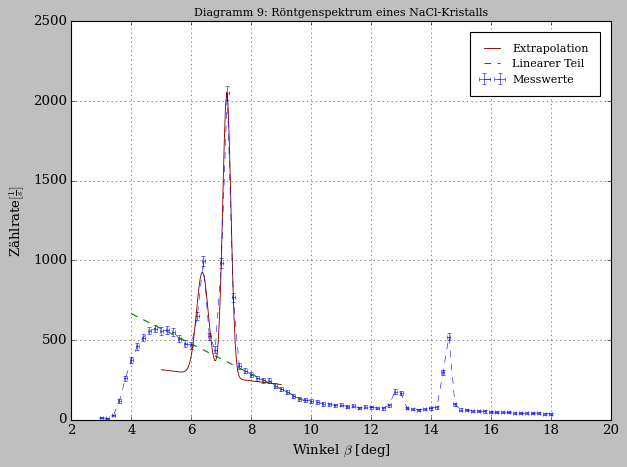

In [15]:
#K_alpha und K_beta erster Ordnung n=1
x3_linear = np.append(data4['Winkel'][9:14], data4['Winkel'][23:34])
y3_linear = np.append(data4['Zählrate'][9:14], data4['Zählrate'][23:34])

popt_lin3, pcov_lin3 = curve_fit(linear, x3_linear, y3_linear, sigma=np.sqrt(y3_linear))
char_corr3 = data4['Zählrate'] - linear(data4['Winkel'], *popt_lin3)
popt_gauss4, pcov_gauss4 = curve_fit(gaussian, data4['Winkel'][14:19],char_corr3[14:19],p0=[500,6.5,0.03,0])
popt_gauss5, pcov_gauss5 = curve_fit(gaussian, data4['Winkel'][19:24],char_corr3[19:24],p0=[1700,7.2,0.03,0])
popt_fin3, pcov_fin3 = curve_fit(gauss_optim, data4['Winkel'],data4['Zählrate'],p0=[*popt_lin3,*popt_gauss4[0:3],*popt_gauss5[0:3]])

#Versuche Analoges mit I=[45:75]
popt_lin4, pcov_lin4 = curve_fit(linear, data4['Winkel'][65:74],data4['Zählrate'][65:74])
corr_data4 = data4['Zählrate']-linear(data4['Winkel'],*popt_lin3)
popt_gauss6, pcov_gauss6 = curve_fit(gaussian, data4['Winkel'][46:52],data4['Zählrate'][46:52],p0=[100,12.8,0.03,0])
popt_gauss7, pcov_gauss7 = curve_fit(gaussian, data4['Winkel'][51:76],corr_data4[51:76],p0=[500,14.7,0.03,0])
popt_fin4, pcov_fin4 = curve_fit(gauss_optim, data4['Winkel'],data4['Zählrate'],p0=[0,10,100,12.5,0.03,500,14.2,0.03])
#Auch nach längerem Versuchen durch Eingrezung der Intervalle ergab sich kein Sinnvolles Ergebnis -> Entnehme die Lagen dem Graphen



plt.clf()
#plt.plot(np.linspace(12,19,100),gauss_optim(np.linspace(12,19,100),*popt_fin4),label='Extrapolation')
#plt.plot(np.linspace(12,18,2),gaussian(np.linspace(12,18,2),*popt_gauss7),ls='--',label='Linearer Term 2ter Ordnung')
#plt.errorbar(unp.nominal_values(beta4[45:76]),unp.nominal_values(counts4[45:76]),xerr=unp.std_devs(beta4[45:76]),yerr=unp.std_devs(beta4[45:76]),ls='--',label='Ordnung 2')
plt.errorbar(unp.nominal_values(beta4),unp.nominal_values(counts4),xerr=unp.std_devs(beta4),yerr=unp.std_devs(counts4),ls='--',label='Messwerte',linewidth=0.5,markersize=0.5)
plt.plot(np.linspace(5,9,100),gauss_optim(np.linspace(5,9,100),*popt_fin3),label='Extrapolation',linewidth=0.8,color='darkred',ls='-')
plt.plot(np.linspace(4,10,100),linear(np.linspace(4,10,100),*popt_lin3),ls='--',label='Linearer Teil')
plt.title('Diagramm 9: Röntgenspektrum eines NaCl-Kristalls',size=10)
plt.ylabel('Zählrate'+r'$[\frac{1}{s}]$')
plt.xlabel('Winkel '+r'$\beta$ '+u'[deg]')
plt.grid(ls='dotted')
plt.legend(frameon=True,fontsize='small', borderpad=1,borderaxespad=1, loc=1)
plt.tight_layout()
plt.savefig('Results/Diagramm9V255.pdf', format='pdf')

#Ordnung 1
K_beta_nacl_1 = unc.ufloat(popt_fin3[3],pcov_fin3[3][1])
K_alpha_nacl_1 = unc.ufloat(popt_fin3[6],-pcov_fin3[6][2]) 
K_alpha_nacl_2 = unc.ufloat(14.627,0.01)
K_beta_nacl_2 = unc.ufloat(12.94,0.01)
print('Der Wert für die Lage des Alpha Maximums erster Ordnung beträgt '+str(K_alpha_nacl_1))
print('Der Wert für die Lage des Beta Maximums erster Ordnung beträgt '+str(K_beta_nacl_1))
print('Der Wert für die Lage des Alpha Maximums erster Ordnung beträgt '+str(K_alpha_nacl_1))
print('Der Wert für die Lage des Beta Maximums erster Ordnung beträgt '+str(K_beta_nacl_1))

Für die Berechnung der Avogadro-Konstante werden nun alle Ergebnisse in Arrays zusammengefasst und danach wird mithilfe der im Grundlagenteil gezeigten Formel diese Konstante berechnet. Dann wird mithilfe der statistischen Operatoren der Mittelwert und die Standardabweichung berechnet. Weil Uncertainties.numpy jedoch alles schon automatisch implementiert, muss lediglich die Summe alles Messwerte durch deren Anzahl geteilt werden.

In [16]:
#Berechnung der Gitterkonstante, nochmal die Zusammenfassung:
K_a_1 = K_a
K_b_1 = K_b
K_a_2 = K2_a
K_b_2 = K2_b
lambda_alpha_1 = lambda_alpha
lambda_alpha_2 = lambda2_alpha
lambda_beta_1 = lambda_beta
lambda_beta_2 = lambda2_beta

lam = unp.uarray([unp.nominal_values(lambda_alpha),unp.nominal_values(lambda_beta),unp.nominal_values(lambda2_alpha),unp.nominal_values(lambda_beta)],
                [unp.std_devs(lambda_alpha),unp.std_devs(lambda_beta),unp.std_devs(lambda2_alpha),unp.std_devs(lambda2_beta)])
n = np.array([1,1,2,2])
theta = unp.uarray([unp.nominal_values(K_alpha_nacl_1*2*const.pi/360),unp.nominal_values(K_beta_nacl_1*2*const.pi/360),unp.nominal_values(K_alpha_nacl_2*2*const.pi/360.),unp.nominal_values(K_beta_nacl_2*2*const.pi/360.)],
               [unp.std_devs(K_alpha_nacl_1*2*const.pi/360),unp.std_devs(K_beta_nacl_1*2*const.pi/360),0.01,0.01])

a=n*lam/unp.sin(theta)
print(sum(a)/len(a))

#Berechnung der Avogadro-Konstante
a_mean = sum(a)/len(a)
rho = 2.164e3
M = 58.44e-3
N_A = 4*M/(rho*pow(a_mean,3))
print(N_A)
sigma = -(unp.nominal_values(N_A)-const.Avogadro)/(unp.std_devs(N_A))
print(sigma)

(5.68+/-0.08)e-10
(5.89+/-0.26)e+23
0.5018091768766452


Unsere Gitterkonstante ergibt sich gemittelt zu:
\begin{align}
    a = (568 \pm 8) pm
\end{align}
Weil jeglicher Literaturwert fehlt, lässt sich nichts drüber aussagen, ob ein systematischer Fehler aufgetreten sein könnte. Betrachtet man die geringe Unsicherheit, so lässt das auf eine genaue Auswertung und eine genaue Messung hindeuten.

\begin{align}
    N_A = (5.89 \pm 0.26)10^{23}1/mol
\end{align}

Die Abweichung zum Literaturwert beträgt 0.5 $\sigma$ .Das bedeutet, dass der Fehler nicht signifikant ist.

## Diskussion

In diesem Versuch wurde zuerst das Plancksche Wirkungsquantunm h berechnet. Über die beiden angegebenen Methoden erhielt man:

\begin{align}
    Erste Ordnung:\\
    \lambda_{\alpha} &= (71,39 \pm 0.06) pm \\
    \lambda_{\beta} &= (63,39 \pm 0.19) pm\\
    Zweite Ordnung:\\
    \lambda_{\alpha} &= (71,200 \pm 0.006) pm \\
    \lambda_{\beta} &= (63,30 \pm 0.04) pm\\
    Plancksche Wirkungsquantum:\\
    h &= (6.4 \pm 0.4) * 10^{-34} Js\\
    h &= (6,4 \pm 1.9)10^{-34} Js\\
    Avogadro-Konstante:\\
    N_A &= (5.89 \pm 0.26)10^{23}1/mol
\end{align}


D.h hier unterscheiden sich die Messergebnisse nur bezüglich ihrer Unsicherheit. Daher kommt man zum Schluss, dass die erste Rechnung viel genauer und daher praxisorientierter ist. Über das charakteristische Spektrum der ersten und zweiten Ordnung erhielt man die Wellenlängen dieser. Diese unterscheiden sich hierbei nicht signifikant voneinander was deren Korrektheit validiert. Die Avogadro-Konstante wurde zuletzt unter Verwendung eines NaCl-Kristalls berechnet. Auch hier weicht unser Ergebnis nicht signifikant vom Literaturwert ab.  


Um die Auswertung aber präzister zu gestalten, könnte man die Genauigkeit des Röntgengerätes verbessern, indem man die Intervallschrittweite des Winkels verringert. Gerade für den NaCl-Kristall schien es mir unmöglich die genaue Lage der Maxima 2ter Ordnung zu bestimmen. Dies lag daran, dass die Messwerte nicht extrapoliert werden konnten. Verantwortlich mache ich daher die Anzahl an Messungen, da bei einem Intervallschritt von $\Delta\beta=0.05$ mehrere Messwerte vorhanden wären, die es ggf. erlaubt hätte, diese Maxima zu extrapolieren, statt mit einem Cursor diese abzulesen.  

Ein statistischer Fehler mag die Temperatur innerhalt des Röntgengerätes sein. Als wir zum ersten Mal die Schutzwand entferten waren wir sichtlich von der geringen Temperatur innerhalb überrascht. Nach den Versuchen hingegen wurde es innerhalb des Gerätes jedoch viel wärmer als die Umgebungstemperatur. Diese merklich starke Fluktuation mag einfluss auf die Apparatur und den Kristall genommen haben, wenn auch nur minimal.  

Großen Einfluss auf das Messergebniss hat jedoch die menschliche Komponente. Beim Berühren des Kristalles wurde zwar drauf geachtet die Oberfläche nicht zu berühren, dies lies sich aber nicht immer vermeiden und mag schon von einer anderen Gruppe getan worden sein. Berührt man den Kristall, bleibt die Fettschicht der Haut zurück und bildet einen Film oberhalb. Dieser kann schon die Photonen brechen, sodass der aufgenommene Winkel stärker vom Tatsächlichen abweicht.